# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from weather_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [103]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [104]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xiuyan
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | glace bay
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | minas de marcona
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | el calafate
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | kralendijk
Processing Record 13 of Set 1 | aral
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | abraham's bay
City not found. Skipping...
Processing Record 21 of Set 1 | keflavik
Processing Record 22 of S

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.31,88,23,7.05,GS,1713141712
1,port-aux-francais,-49.3500,70.2167,5.47,75,99,13.89,TF,1713141712
2,port elizabeth,-33.9180,25.5701,21.17,94,20,5.66,ZA,1713141712
3,edinburgh of the seven seas,-37.0676,-12.3116,15.83,71,17,7.12,SH,1713141712
4,kerikeri,-35.2268,173.9474,23.84,59,9,2.12,NZ,1713141712


In [65]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.31,88,23,7.05,GS,1713141712
1,port-aux-francais,-49.3500,70.2167,5.47,75,99,13.89,TF,1713141712
2,port elizabeth,-33.9180,25.5701,21.17,94,20,5.66,ZA,1713141712
3,edinburgh of the seven seas,-37.0676,-12.3116,15.83,71,17,7.12,SH,1713141712
4,kerikeri,-35.2268,173.9474,23.84,59,9,2.12,NZ,1713141712


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

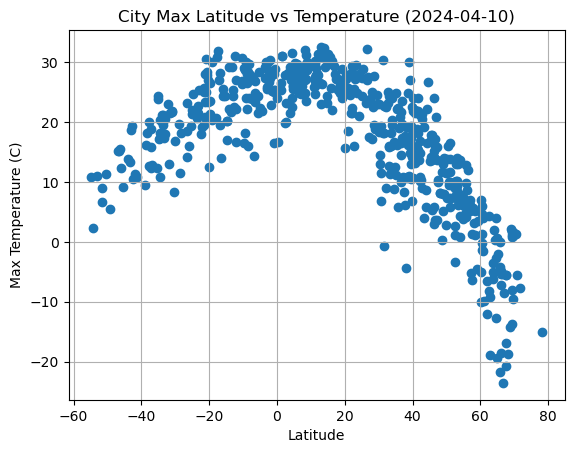

In [67]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.title("City Max Latitude vs Temperature (2024-04-10)")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

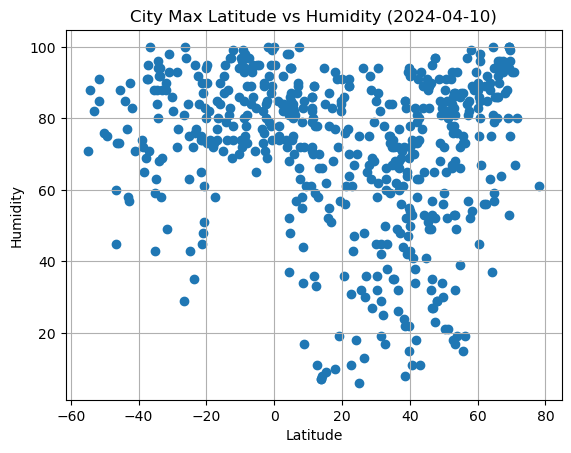

In [71]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis)
plt.title("City Max Latitude vs Humidity (2024-04-10)")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

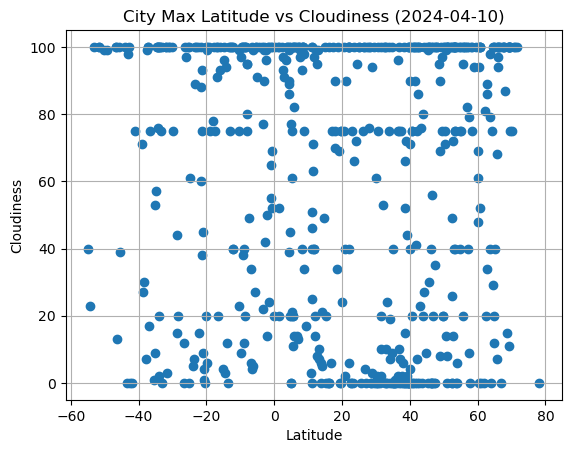

In [73]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.title("City Max Latitude vs Cloudiness (2024-04-10)")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

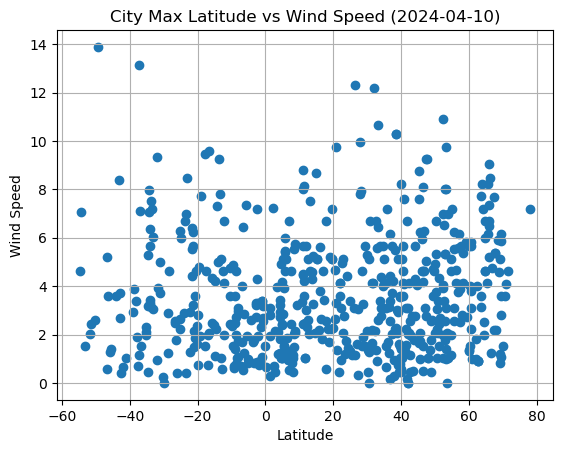

In [74]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.title("City Max Latitude vs Wind Speed (2024-04-10)")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

#pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(capomulin_average['Weight (g)'], 
                                                            capomulin_average['Tumor Volume (mm3)'])


# YOUR CODE HERE

In [75]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,tamanrasset,22.7850,5.5228,15.95,31,0,5.14,DZ,1713141712
7,choyr,46.3611,108.3611,2.97,32,0,5.97,MN,1713141713
8,mbandjok,4.4500,11.9000,22.57,98,99,1.81,CM,1713141713
12,stanley,54.8680,-1.6985,7.51,86,75,4.63,GB,1713141651
14,egilsstadir,65.2653,-14.3948,-2.05,86,40,4.12,IS,1713141713


In [76]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]
# Display sample data
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.31,88,23,7.05,GS,1713141712
1,port-aux-francais,-49.3500,70.2167,5.47,75,99,13.89,TF,1713141712
2,port elizabeth,-33.9180,25.5701,21.17,94,20,5.66,ZA,1713141712
3,edinburgh of the seven seas,-37.0676,-12.3116,15.83,71,17,7.12,SH,1713141712
4,kerikeri,-35.2268,173.9474,23.84,59,9,2.12,NZ,1713141712


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7437504697149965


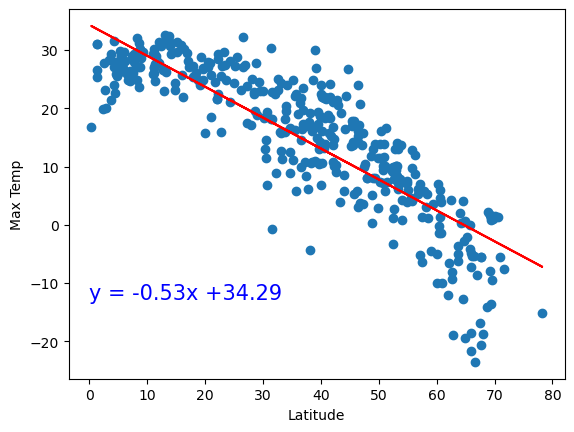

In [79]:
# Linear regression on Northern Hemisphere
from scipy import stats 

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values) 

regress_values = x_values * slope + intercept 
line_eq = "y = " +str(round(slope, 2)) + "x +" + str(round(intercept, 2)) 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp') 
plt.annotate(line_eq, (20,5), fontsize=15, color="blue", xytext=(0, -10), ha='left', va='top') 

print(f"The r-value is: {rvalue**2}")

plt.show()

# YOUR CODE HERE

The r-value is: 0.5460159979973601


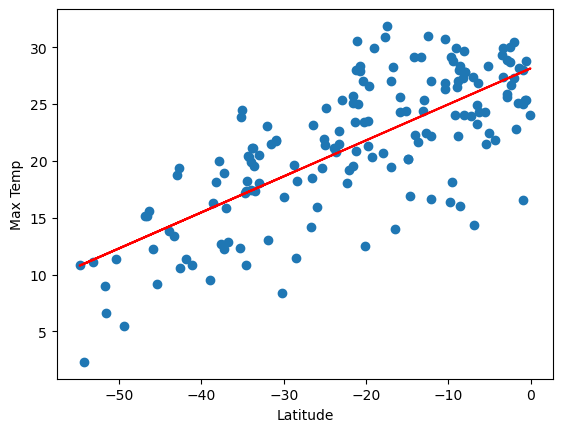

In [101]:
# Linear regression on Southern Hemisphere

from scipy import stats 

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values) 

regress_values = x_values * slope + intercept 
line_eq = "y = " +str(round(slope, 2)) + "x +" + str(round(intercept, 2)) 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp') 
plt.annotate(line_eq, (20,5), fontsize=15, color="blue", xytext=(0, 20), ha='left', va='top') 

print(f"The r-value is: {rvalue**2}")

plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01122006011129175


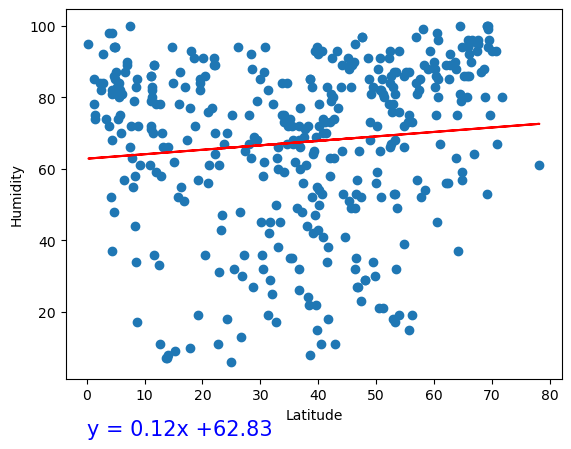

In [82]:
# Northern Hemisphere
from scipy import stats 

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values) 

regress_values = x_values * slope + intercept 
line_eq = "y = " +str(round(slope, 2)) + "x +" + str(round(intercept, 2)) 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity') 
plt.annotate(line_eq, (20,5), fontsize=15, color="blue", xytext=(0, -10), ha='left', va='top') 

print(f"The r-value is: {rvalue**2}")

plt.show()

# YOUR CODE HERE

The r-value is: 0.0002808747046324607


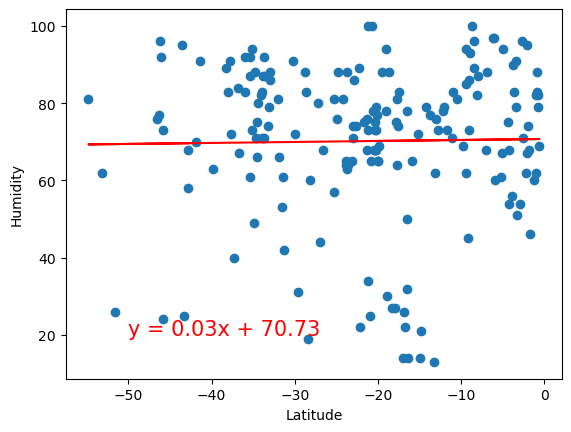

In [18]:
# Southern Hemisphere

from scipy import stats 

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values) 

regress_values = x_values * slope + intercept 
line_eq = "y = " +str(round(slope, 2)) + "x +" + str(round(intercept, 2)) 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity') 
plt.annotate(line_eq, (20,5), fontsize=15, color="blue", xytext=(0, -10), ha='left', va='top') 

print(f"The r-value is: {rvalue**2}")

plt.show()

# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006705803020865409


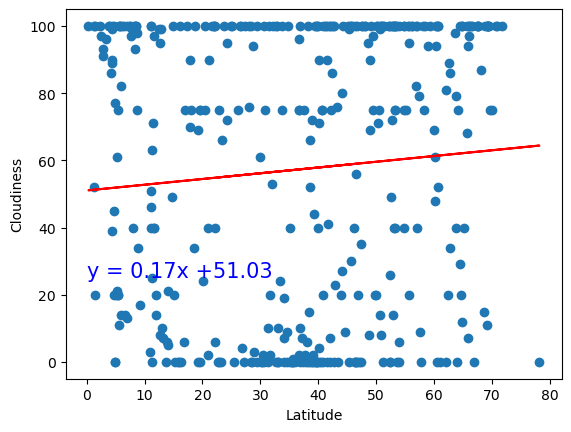

In [99]:
# Northern Hemisphere
from scipy import stats 

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values) 

regress_values = x_values * slope + intercept 
line_eq = "y = " +str(round(slope, 2)) + "x +" + str(round(intercept, 2)) 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness') 
plt.annotate(line_eq, (20,5), fontsize=15, color="blue", xytext=(0, 30), ha='left', va='top') 

print(f"The r-value is: {rvalue**2}")

plt.show()

# YOUR CODE HERE

The r-value is: 0.0013753609956114923


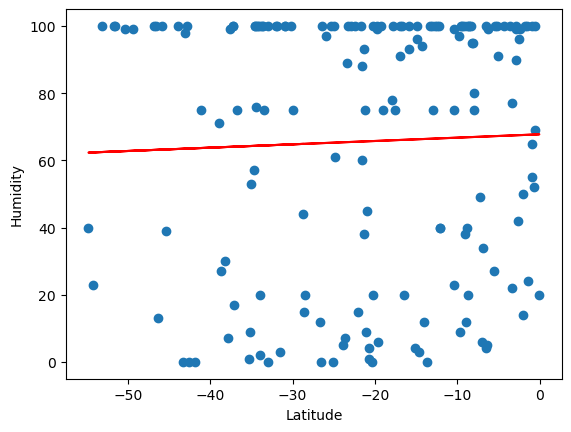

In [98]:
# Southern Hemisphere

from scipy import stats 

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values) 

regress_values = x_values * slope + intercept 
line_eq = "y = " +str(round(slope, 2)) + "x +" + str(round(intercept, 2)) 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness') 
plt.annotate(line_eq, (20,5), fontsize=15, color="blue", xytext=(0, -10), ha='left', va='top') 

print(f"The r-value is: {rvalue**2}")

plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01981711275686549


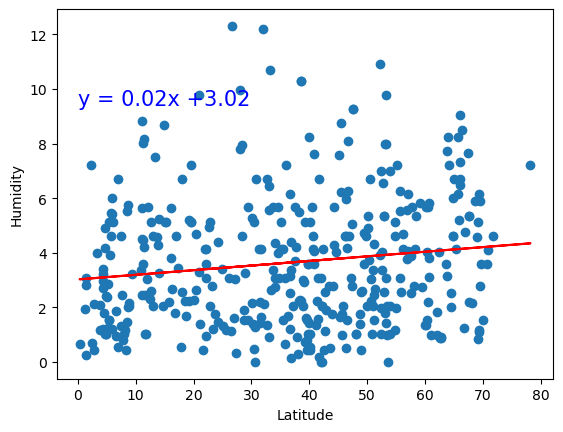

In [87]:
# Northern Hemisphere
from scipy import stats 

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values) 

regress_values = x_values * slope + intercept 
line_eq = "y = " +str(round(slope, 2)) + "x +" + str(round(intercept, 2)) 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity') 
plt.annotate(line_eq, (20,5), fontsize=15, color="blue", xytext=(0, 10), ha='left', va='top') 

print(f"The r-value is: {rvalue**2}")

plt.show()

# YOUR CODE HERE

The r-value is: 0.030311193240029524


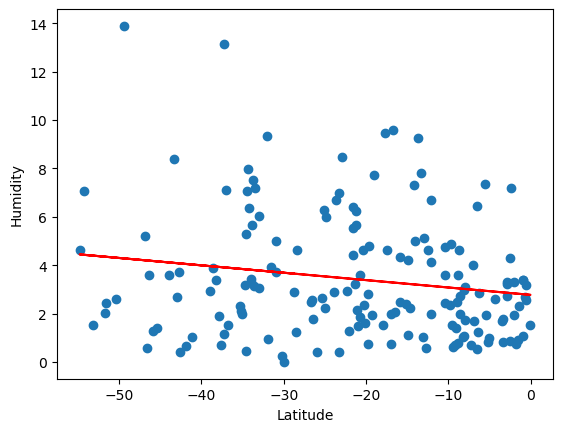

In [90]:
# Southern Hemisphere

from scipy import stats 

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values) 

regress_values = x_values * slope + intercept 
line_eq = "y = " +str(round(slope, 2)) + "x +" + str(round(intercept, 2)) 

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity') 
plt.annotate(line_eq, (20,5), fontsize=15, color="blue", xytext=(0, -10), ha='left', va='top') 

print(f"The r-value is: {rvalue**2}")

plt.show()
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE